# **Atividade Proposta**

Implemente uma Rede Neural rasa para classificação de uma base multiclasse.

Esta rede deve:

Aceitar rótulos que podem ser números ou textos; Predizer os rótulos originais da base de dados;

Passar por parâmetro no construtor: Função de custo e cálculo do gradiente; Taxa de aprendizado; Número máximo de iterações; Threshold;

Funcionar para bases binárias. Teste pelo menos duas funções de custo diferentes em uma base multiclasse e uma base binária.

Plote gráficos com os hiperplanos separadores encontrados pelos algoritmos de treinamento. Se a base escolhida tiver mais do que 2 características, escolha as que você julgar que fornecem a melhor visualização.

# **Importações de Bibliotecas e Funções Básicas**

In [341]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import label_binarize

from sklearn.base import BaseEstimator, ClassifierMixin


def geradataset(tamanho=20, centros=2):
    X, y = make_blobs(n_samples=tamanho, centers=centros, center_box=(0, 1.0), cluster_std=0.05)
    return X, y

def plotadataset(X, y):
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

def plotahiperplano(vetor, bias=0, xmin=0, xmax=1):
    xs = np.linspace(xmin, xmax, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - bias / vetor[1]
    plt.plot(xs,ys)

# **Funções de Custo**

In [342]:
class CustoPerceptron():
    @staticmethod
    def erro(y, ypred):
        return y - ypred
    @staticmethod
    def custo(y, ypred):
        return np.sum(CustoPerceptron.erro(y, ypred)**2)
    @staticmethod
    def gradiente(y, ypred, X):
        return np.matmul(X.T, CustoPerceptron.erro(y, ypred))

In [343]:
class Adaline():
  def __init__(self):
    self.preactivated = True
  @staticmethod
  def erro(y,ypred):
    return y-ypred
  @staticmethod
  def custo(y,ypred):
    return np.sum((1 - Adaline.erro(y,ypred))**2)
  @staticmethod
  def gradiente(y,ypred, X):
    return np.matmul(X.T,Adaline.erro(y,ypred))

# **Implementação do Perceptron - Multiclasse**

In [344]:
class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, custo=CustoPerceptron(), alpha=0.001,maxiter=200,w = None):
        self.w = w
        self.activation = lambda a: (a>=0)*2-1
        self.alpha = alpha
        self.maxiter = maxiter
        self.custo = custo
    
    @staticmethod
    def includebias(X):
        bias = np.ones((X.shape[0],1))
        Xb = np.concatenate((bias,X), axis=1)
        return Xb

    def fit(self, X, y):
        Xb = Perceptron.includebias(X)
        self.labels = list(set(y))
        if len(self.labels) > 2:
            y = label_binarize(y, classes=self.labels)*2-1
            self.w = np.random.uniform(-1, 1, size=(Xb.shape[1], y.shape[1]))
        else:
            self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
        for _ in range(self.maxiter):
            a = self.preactivate(X)
            ypred = self.activation(a)
            custo = self.custo.custo(y, ypred)
            if custo == 0:
                break
            self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, Xb)


    def preactivate(self, X):
        Xb = Perceptron.includebias(X)
        return np.matmul(Xb, self.w)

    def predict(self, X):
        a = self.preactivate(X)
        if len(self.w.shape)  > 1:
            idx = np.argmax(a, axis=1)
            ypred = np.array([self.labels[i] for i in idx])
        else:
            ypred = self.activation(a)
        return ypred

# **Treinando com 4 Classes**

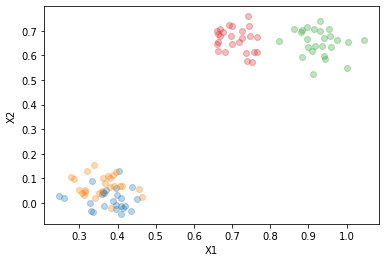

In [345]:
X, y = geradataset(100, 4)
plotadataset(X, y)
plt.show()
ybin = label_binarize(y, classes=list(set(y)))*2-1
# ybin

In [346]:
p_CustoPerceptron = Perceptron()
p_CustoPerceptron.fit(X, y)
p_Adaline = Perceptron(custo=Adaline())
p_Adaline.fit(X, y)

# **Testando com 4 Classes**



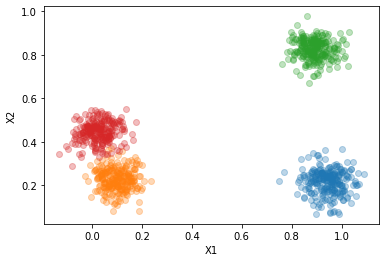

In [347]:
X, y = geradataset(1000, 4)
plotadataset(X, y)
plt.show()
ybin = label_binarize(y, classes=list(set(y)))*2-1

0.546
[[ 0.15041518 -0.29419742  0.3040658  -0.25582535]
 [-0.29890994  0.09007419  0.00824637  0.29747927]] [-0.02104531  0.07574324 -0.25468277  0.03681828]


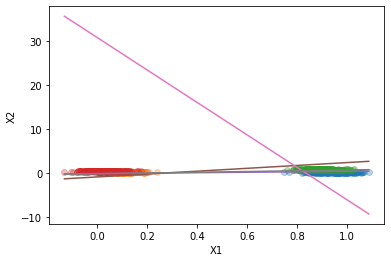

In [348]:
ypred = p_CustoPerceptron.predict(X)
print(sum(y == ypred)/len(y))
print(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(p_CustoPerceptron.w[1:,i], p_CustoPerceptron.w[0,i], min(X[:,0]), max(X[:,0]))

0.276
[[-0.3331747   0.07864369  0.3944086  -0.22382055]
 [-0.10037029 -0.16341843 -0.21984692  0.37357214]] [ 0.10130573 -0.05328697 -0.17902716 -0.09027935]


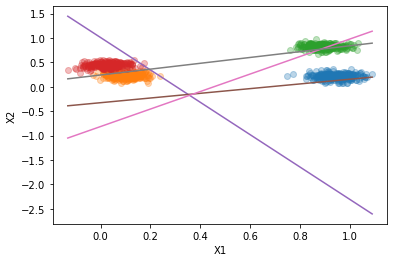

In [349]:
ypred = p_Adaline.predict(X)
print(sum(y == ypred)/len(y))
print(p_Adaline.w[1:], p_Adaline.w[0])

plotadataset(X, y)
for i in range(len(set(y))):
    plotahiperplano(p_Adaline.w[1:,i], p_Adaline.w[0,i], min(X[:,0]), max(X[:,0]))

# **Treinando classe binária com Custo perceptron**

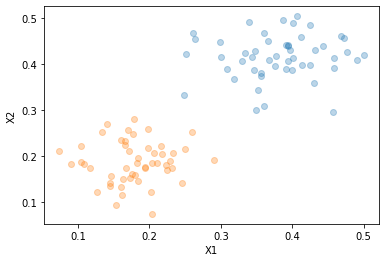

In [392]:
X, y = geradataset(100, 2)
plotadataset(X, y)
plt.show()
ybin = []
for i in y:
    ybin.append(i*2-1)

In [393]:
p_CustoPerceptron = Perceptron()
p_CustoPerceptron.fit(X, ybin)

0.96
[ 0.27648548 -1.20918098] 0.26768953460767625


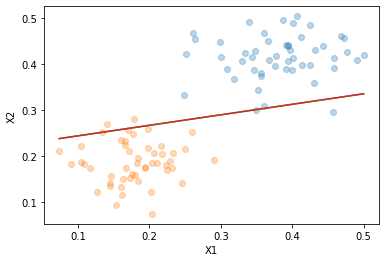

In [394]:
ypred = p_CustoPerceptron.predict(X)
print(sum(ybin == ypred)/len(ybin))
print(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0])

plotadataset(X, y)
for i in range(len(set(ybin))):
    plotahiperplano(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0], min(X[:,0]), max(X[:,0]))

# **Testando classe binária**

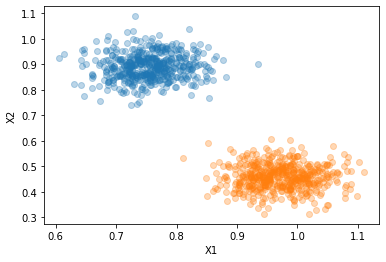

In [397]:
X, y = geradataset(1000, 2)
plotadataset(X, y)
plt.show()
ybin = []
for i in y:
    ybin.append(i*2-1)

0.685
[ 0.27648548 -1.20918098] 0.26768953460767625


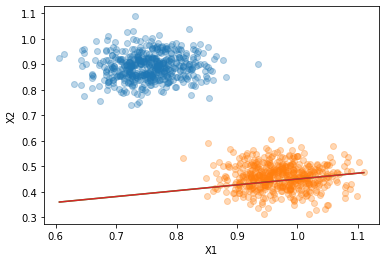

In [398]:
ypred = p_CustoPerceptron.predict(X)
print(sum(ybin == ypred)/len(ybin))
print(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0])

plotadataset(X, y)
for i in range(len(set(ybin))):
    plotahiperplano(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0], min(X[:,0]), max(X[:,0]))

# Binário com Adaline

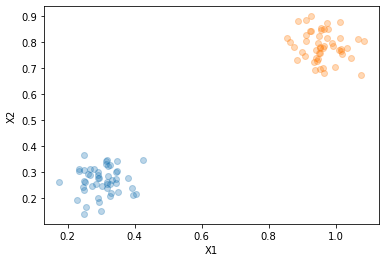

In [401]:
X, y = geradataset(100, 2)
plotadataset(X, y)
plt.show()
ybin = []
for i in y:
    ybin.append(i*2-1)

In [402]:
p_Adaline = Perceptron(custo=Adaline())
p_Adaline.fit(X, ybin)

1.0
[-0.011911   0.2859194] -0.1568896053630364


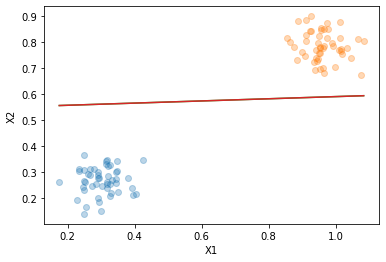

In [403]:
ypred = p_Adaline.predict(X)
print(sum(ybin == ypred)/len(ybin))
print(p_Adaline.w[1:], p_Adaline.w[0])

plotadataset(X, y)
for i in range(len(set(ybin))):
    plotahiperplano(p_Adaline.w[1:], p_Adaline.w[0], min(X[:,0]), max(X[:,0]))

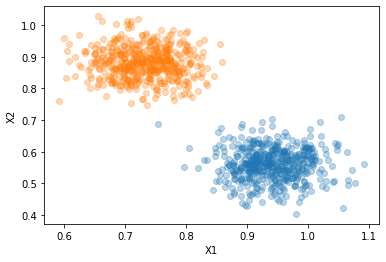

In [404]:
X, y = geradataset(1000, 2)
plotadataset(X, y)
plt.show()
ybin = []
for i in y:
    ybin.append(i*2-1)

0.853
[-0.011911   0.2859194] -0.1568896053630364


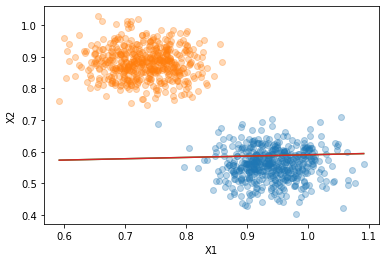

In [405]:
ypred = p_Adaline.predict(X)
print(sum(ybin == ypred)/len(ybin))
print(p_Adaline.w[1:], p_Adaline.w[0])

plotadataset(X, y)
for i in range(len(set(ybin))):
    plotahiperplano(p_Adaline.w[1:], p_Adaline.w[0], min(X[:,0]), max(X[:,0]))

# **Treinando e Testando com Rótulo em Texto**

In [361]:
X, y = geradataset(10, 3)

In [362]:
y

array([0, 1, 2, 0, 2, 0, 1, 0, 2, 1])

In [363]:
import string
import random
def random_generator(size=6, chars=string.ascii_uppercase + string.digits):
 return ''.join(random.choice(chars) for _ in range(size))

In [364]:
def gera_rotulo_texto(vetor):
  resultado = []
  dicionario = {}

  for i in vetor:
    if i in dicionario.keys():
      valor = dicionario[i]
    else:
      valor  = random_generator()
      dicionario[i] = valor
    resultado.append(valor)
  return resultado


In [365]:
ytext = gera_rotulo_texto(y)
y,ytext

(array([0, 1, 2, 0, 2, 0, 1, 0, 2, 1]),
 ['4SA80X',
  'KUR9GO',
  'SRL8YT',
  '4SA80X',
  'SRL8YT',
  '4SA80X',
  'KUR9GO',
  '4SA80X',
  'SRL8YT',
  'KUR9GO'])

In [366]:
p_CustoPerceptron = Perceptron()
p_CustoPerceptron.fit(X, ytext)
p_Adaline = Perceptron(custo=Adaline())
p_Adaline.fit(X, ytext)

In [367]:
ypred = p_CustoPerceptron.predict(X)
ypred

array(['4SA80X', 'KUR9GO', 'SRL8YT', '4SA80X', 'SRL8YT', '4SA80X',
       'KUR9GO', '4SA80X', 'SRL8YT', 'KUR9GO'], dtype='<U6')

In [368]:
print(sum(ytext == ypred)/len(ytext))
print(p_CustoPerceptron.w[1:], p_CustoPerceptron.w[0])

1.0
[[ 0.29533945 -0.59715174 -0.78756201]
 [ 0.14207507 -0.0823903  -0.28547188]] [-0.28421808  0.39278707  0.59027846]


In [369]:
ypred = p_Adaline.predict(X)
ypred

array(['4SA80X', 'KUR9GO', 'SRL8YT', '4SA80X', 'SRL8YT', '4SA80X',
       'KUR9GO', '4SA80X', 'SRL8YT', 'KUR9GO'], dtype='<U6')

In [370]:
print(sum(ytext == ypred)/len(ytext))
print(p_Adaline.w[1:], p_Adaline.w[0])

1.0
[[-0.33129521 -0.91282524 -0.86986371]
 [-0.09700977 -0.12693085 -0.31518479]] [0.23531555 0.59957068 0.64934819]
